## **FEATURE SELECTION**

In [1]:
# %pip install category_encoders


In [3]:
import pandas as pd
import numpy as np
import phik
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce


In [4]:
df= pd.read_csv('../Data/Alquileres_Madrid.csv', index_col= 0)

In [3]:
df.head()

,type,price,private_owner,floor_built,floor,bedrooms,bathrooms,second_hand,lift,garage_included,...,balcony,storeroom,swimming_pool,district,subdistrict,postalcode,last_update,Street,latitude,longitude
0,Flat,1400,0,60,3.0,2,1,1,1,0,...,0,0,0,Chamartín,Castilla,28046.0,November,4,40.476788,-3.684412
1,Penthouse,1300,0,77,6.0,2,2,1,1,0,...,0,0,0,Chamartín,Bernabéu-Hispanoamérica,28016.0,November,NaN,NaN,NaN
2,Duplex,950,0,72,3.0,1,1,1,1,0,...,0,0,0,Chamartín,Prosperidad,28002.0,November,NaN,NaN,NaN
3,Flat,2975,0,160,3.0,4,3,1,1,1,...,0,0,1,Chamartín,El Viso,NaN,November,NaN,NaN,NaN
4,Studio,650,0,30,4.0,0,1,1,1,0,...,1,0,0,Chamartín,Prosperidad,28002.0,November,Calle de Luis Cabrera,40.443455,-3.673905


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7818 entries, 0 to 7817
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              7818 non-null   object 
 1   price             7818 non-null   int64  
 2   private_owner     7818 non-null   int64  
 3   floor_built       7818 non-null   int64  
 4   floor             7397 non-null   float64
 5   bedrooms          7818 non-null   int64  
 6   bathrooms         7818 non-null   int64  
 7   second_hand       7818 non-null   int64  
 8   lift              7818 non-null   int64  
 9   garage_included   7818 non-null   int64  
 10  furnished         7818 non-null   int64  
 11  equipped_kitchen  7818 non-null   int64  
 12  fitted_wardrobes  7818 non-null   int64  
 13  air_conditioning  7818 non-null   int64  
 14  terrace           7818 non-null   int64  
 15  balcony           7818 non-null   int64  
 16  storeroom         7818 non-null   int64  


In [5]:
df.floor.unique()

array([ 3.,  6.,  4.,  0.,  1., nan,  5.,  2.,  9.,  8., 10.,  7., 20.,
       11., 13., 19., 12., 14., 16., 15., 18., 17., 23., 21., 30., 26.,
       27., 22.])

In [6]:
len(df[df['floor'].isnull()])

421

Vamos a quedarnos con las filas donde no haya valor nulo en la columna floor, ya que no se pierden muchos registros, y rellenarlos con la moda metería demasiada aleatoriedad.

In [5]:
df = df[~df['floor'].isnull()]

In [6]:
df['floor'] = df['floor'].astype('Int64')

interval columns not set, guessing: ['price', 'private_owner', 'floor_built', 'floor', 'bedrooms', 'bathrooms', 'second_hand', 'lift', 'garage_included', 'furnished', 'equipped_kitchen', 'fitted_wardrobes', 'air_conditioning', 'terrace', 'balcony', 'storeroom', 'swimming_pool', 'postalcode', 'latitude', 'longitude']


c:\Users\jimea\AppData\Local\Programs\Python\Python37\lib\site-packages\phik\data_quality.py:62: UserWarning: The number of unique values of variable Street is large: 1804. Are you sure this is not an interval variable? Analysis for pairs of variables including Street can be slow.
  col, df[col].nunique()


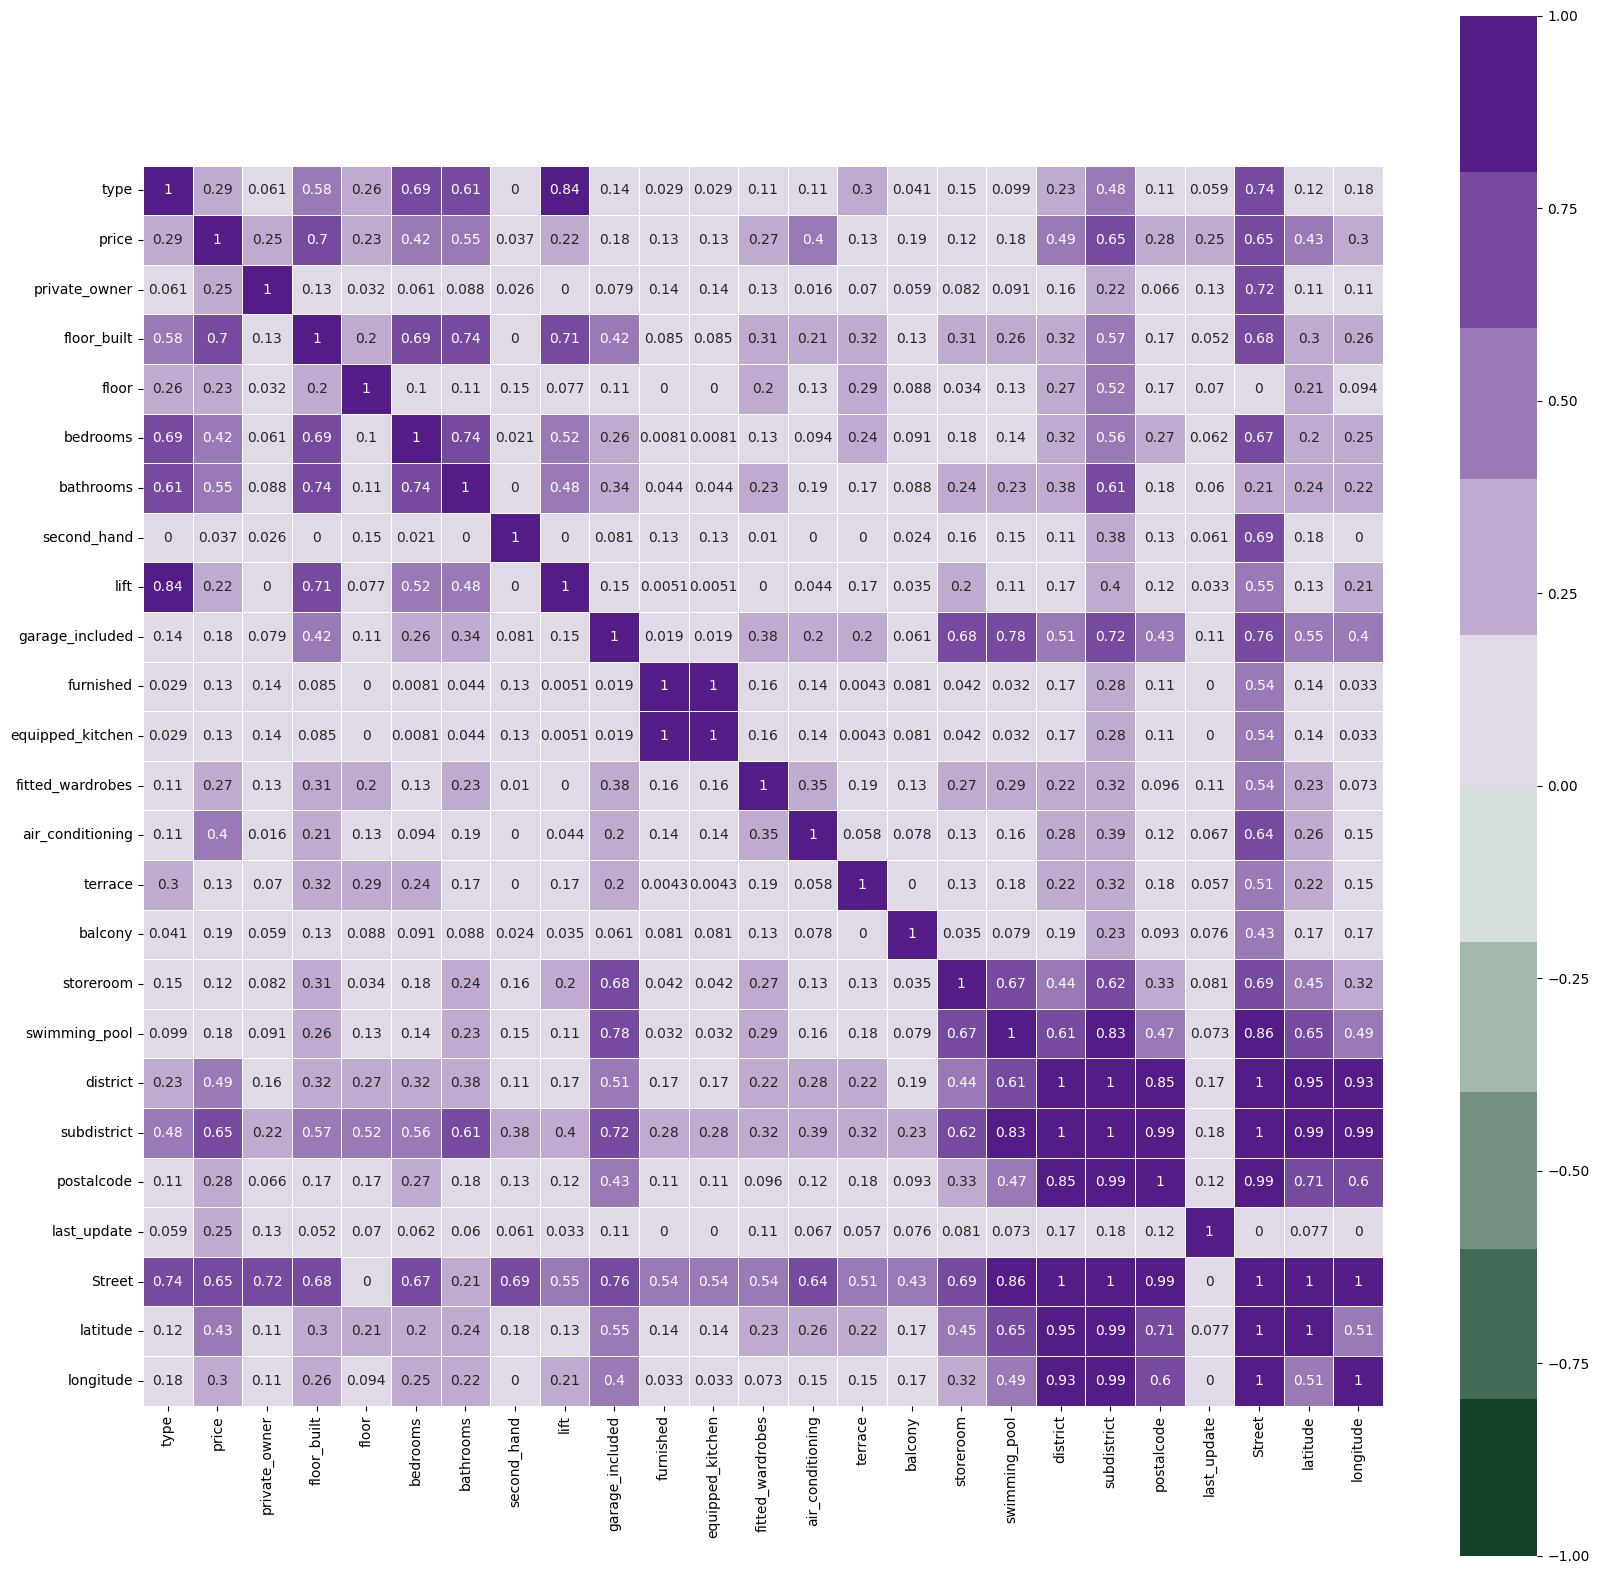

In [11]:
phik_matrix = df.phik_matrix()

plt.figure(figsize=(20,20))
sns.heatmap(phik_matrix,
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

In [12]:
df.phik_matrix()['price'].sort_values(ascending=False)

interval columns not set, guessing: ['price', 'private_owner', 'floor_built', 'floor', 'bedrooms', 'bathrooms', 'second_hand', 'lift', 'garage_included', 'furnished', 'equipped_kitchen', 'fitted_wardrobes', 'air_conditioning', 'terrace', 'balcony', 'storeroom', 'swimming_pool', 'postalcode', 'latitude', 'longitude']


price               1.000000
floor_built         0.699230
Street              0.649549
subdistrict         0.649213
bathrooms           0.546403
district            0.493280
latitude            0.428330
bedrooms            0.417231
air_conditioning    0.399040
longitude           0.299855
type                0.290576
postalcode          0.278388
fitted_wardrobes    0.269672
private_owner       0.248724
last_update         0.246625
floor               0.228501
lift                0.219876
balcony             0.187662
swimming_pool       0.183344
garage_included     0.177701
terrace             0.134537
equipped_kitchen    0.126063
furnished           0.126063
storeroom           0.123673
second_hand         0.037022
Name: price, dtype: float64

Parece que la feature que más influye en el precio es los metros cuadrados construidos.

Las columnas que indican geolocalización tienen una alta correlación entre sí.

interval columns not set, guessing: ['longitude', 'latitude', 'postalcode', 'price']


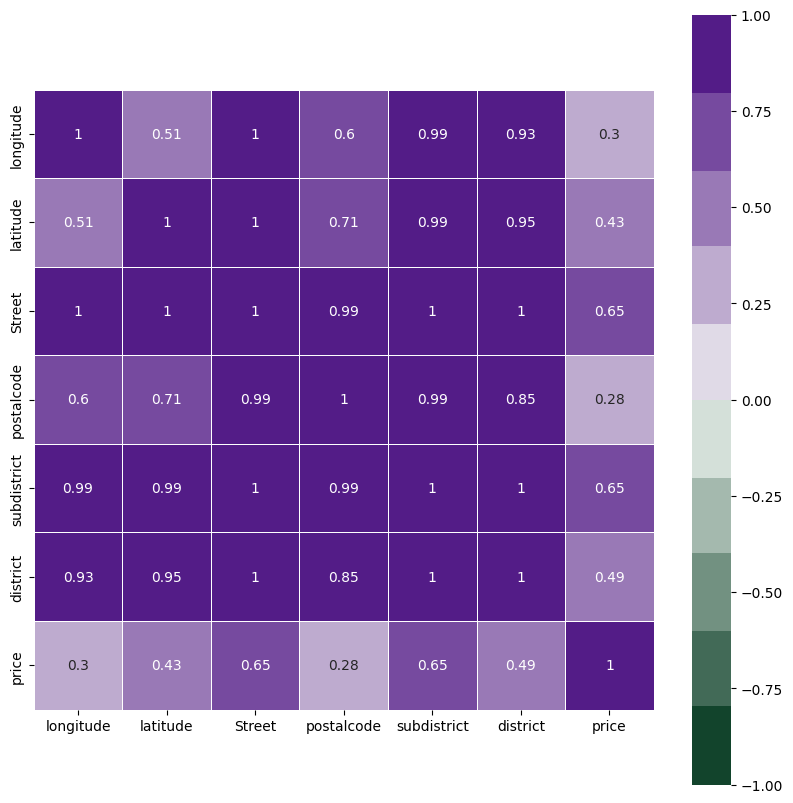

In [13]:
phik_matrix_location = df[['longitude', 'latitude', 'Street', 'postalcode', 'subdistrict', 'district', 'price']].phik_matrix()

plt.figure(figsize=(10,10))
sns.heatmap(phik_matrix_location,
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

In [14]:
phik_matrix = df[['longitude', 'latitude', 'Street', 'postalcode', 'subdistrict', 'district', 'price']].phik_matrix()['price']
unique = [df[i].unique() for i in ['longitude', 'latitude', 'Street', 'postalcode', 'subdistrict', 'district', 'price']]

len(phik_matrix) == len(unique)

interval columns not set, guessing: ['longitude', 'latitude', 'postalcode', 'price']


True

In [15]:
names = ['longitude', 'latitude', 'Street', 'postalcode', 'subdistrict', 'district', 'price']

for i in range(len(phik_matrix) -1):
    print(names[i], '->', 'Correlación: ', phik_matrix[i], '  Valores únicos: ', len(unique[i]))

longitude -> Correlación:  0.2998551096123422   Valores únicos:  2276
latitude -> Correlación:  0.42832972729626667   Valores únicos:  2273
Street -> Correlación:  0.6495486879818403   Valores únicos:  1805
postalcode -> Correlación:  0.27838783959749847   Valores únicos:  57
subdistrict -> Correlación:  0.6492126533713799   Valores únicos:  135
district -> Correlación:  0.4932799596372919   Valores únicos:  21


Las columnas más correlacionadas con el precio son el nombre de la calle y el subdistrito. Entre estas dos nos quedamos con el subdistrito, pues tiene considerablemente muchos menos valores únicos. Aún así, podrían ser demasiados valores unicos (habrá subdistritos que apenas tengan registros), probaremos primero con esta columna y si no cambiaremos a distrito. A priori, las columnas latitud, longitud, nombre de la calle y código postal no las utilizaremos debido a que tienen muchos valores nulos

----

## **DIVIDIR EN X e Y**

In [7]:
X = df.drop(columns = 'price')
y = df['price']

In [7]:
print(X.shape)
print(y.shape)

(7397, 24)
(7397,)


## **DIVIDIR EN TRAIN Y TEST**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5917, 24)
(5917,)
(1480, 24)
(1480,)


In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5917 entries, 5439 to 7682
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              5917 non-null   object 
 1   private_owner     5917 non-null   int64  
 2   floor_built       5917 non-null   int64  
 3   floor             5917 non-null   Int64  
 4   bedrooms          5917 non-null   int64  
 5   bathrooms         5917 non-null   int64  
 6   second_hand       5917 non-null   int64  
 7   lift              5917 non-null   int64  
 8   garage_included   5917 non-null   int64  
 9   furnished         5917 non-null   int64  
 10  equipped_kitchen  5917 non-null   int64  
 11  fitted_wardrobes  5917 non-null   int64  
 12  air_conditioning  5917 non-null   int64  
 13  terrace           5917 non-null   int64  
 14  balcony           5917 non-null   int64  
 15  storeroom         5917 non-null   int64  
 16  swimming_pool     5917 non-null   int64

### ENCODER DE VARIABLES CATEGÓRICAS

- Para las columnas con alta cardinalidad: CatBoostEncoder

In [9]:
ce_encoder = ce.cat_boost.CatBoostEncoder()
ce_encoder.fit(X_train[['district', 'subdistrict', 'Street']], y_train)
X_train[['district', 'subdistrict', 'Street']] = ce_encoder.transform(X_train[['district', 'subdistrict', 'Street']])
X_test[['district', 'subdistrict', 'Street']] = ce_encoder.transform(X_test[['district', 'subdistrict', 'Street']])


- Para los meses del año: les asignamos un valor del 1 al 12, pues son ordenables:

In [17]:
df.last_update.value_counts(dropna=False)

November     4195
October      2341
September     373
May            82
August         77
June           69
January        54
NaN            53
July           47
February       41
December       29
March          19
April          17
Name: last_update, dtype: int64

Antes, vamos a rellenar los valores nulos con la moda.

In [10]:
X_train['last_update'] = X_train['last_update'].fillna(X_train['last_update'].mode()[0])
X_test['last_update'] = X_test['last_update'].fillna(X_train['last_update'].mode()[0])


In [19]:
X_train.last_update.value_counts()

November     3392
October      1890
September     297
May            64
August         62
June           54
January        47
July           39
February       30
December       23
April          10
March           9
Name: last_update, dtype: int64

In [11]:
months = {'January': 1,
          'February': 2,
          'March': 3,
          'April':4,
          'May': 5,
          'June': 6,
          'July': 7,
          'August': 8,
          'September': 9,
          'October': 10,
          'November': 11,
          'December': 12 }

In [12]:
X_train['last_update'] = X_train['last_update'].map(months)
X_test['last_update'] = X_test['last_update'].map(months)

- Para el tipo de vivienda: HotEncoder

Antes vamos a ver que valores únicos tenemos.

In [22]:
X_train['type'].value_counts()

Flat             4955
Penthouse         412
Studio            329
Duplex            172
Terraced           22
Semi-detached      19
Detached            8
Name: type, dtype: int64

Terraced, Semi-detached y Detached tienen muy pocos registros. Para hacer el Hot-Encoder vamos a juntarlas en un solo tipo, como viviendas unifamiliares. Antes vamos a ver si tiene sentido gracias al conjunto de nuestros datos y la columna de precio veremos la relación de los tipos de vivienda con el precio.

In [23]:
df.groupby(['type']).median()[['price']]

,price
type,
Detached,3850.0
Duplex,1650.0
Flat,1400.0
Penthouse,1750.0
Semi-detached,3750.0
Studio,850.0
Terraced,2950.0


Aparentemente los valores de precio medianos son bastante más altos en estros tres tipos de vivienda, por lo que podría tener sentido unirlos en un solo tipo. 

<Figure size 1500x500 with 0 Axes>

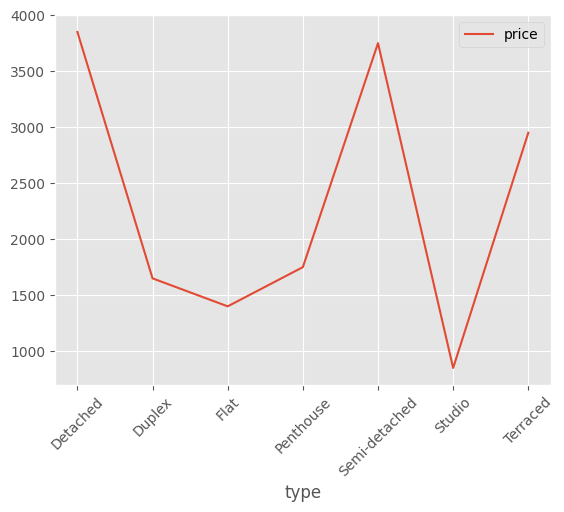

In [117]:
plt.figure(figsize=(15,5))
df.groupby(['type']).median()[['price']].plot()
plt.xticks(rotation = 45);

<Figure size 1500x500 with 0 Axes>

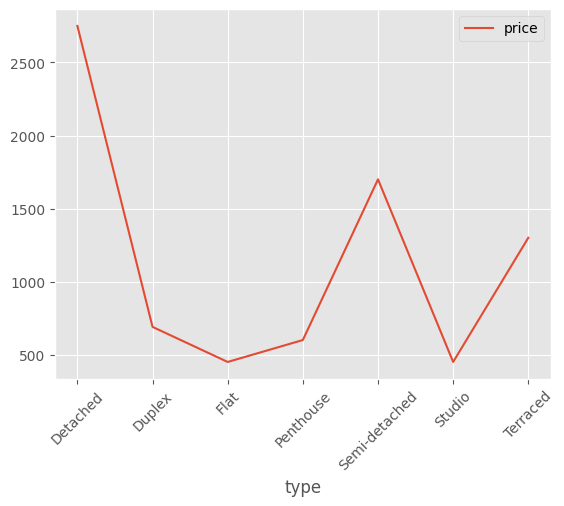

In [118]:
plt.figure(figsize=(15,5))
df[['type', 'price']].groupby(['type']).min().plot()
plt.xticks(rotation = 45);

Comprobamos además que el mínimo es bastante alto el relación al que teníamos en el conjunto del dataset (450€). Vamos a proceder a cambiar los tipos.

In [13]:
X_train['type'] = X_train['type'].where((X_train['type'] != 'Detached') & (X_train['type'] != 'Semi-detached')\
     & (X_train['type'] != 'Terraced'), 'Single-family')
     
X_test['type'] = X_test['type'].where((X_test['type'] != 'Detached') & (X_test['type'] != 'Semi-detached')\
     & (X_test['type'] != 'Terraced'), 'Single-family')

In [17]:
X_train['type'].value_counts()

Flat             4955
Penthouse         412
Studio            329
Duplex            172
Single-family      49
Name: type, dtype: int64

In [14]:
X_train = pd.get_dummies(X_train, columns=['type'])
X_test = pd.get_dummies(X_test, columns=['type'])

## **FEATURE IMPORTANCE**

De momento vamos a quitar las columnas de street, postalcode, latitude y longitude

In [15]:
X_train2 = X_train.drop(columns=['Street', 'latitude', 'longitude', 'postalcode'])
X_test2 = X_test.drop(columns=['Street', 'latitude', 'longitude', 'postalcode'])

In [20]:
X_train2

,private_owner,floor_built,floor,bedrooms,bathrooms,second_hand,lift,garage_included,furnished,equipped_kitchen,...,storeroom,swimming_pool,district,subdistrict,last_update,type_Duplex,type_Flat,type_Penthouse,type_Single-family,type_Studio
5439,1,85,1,3,1,1,1,0,1,1,...,0,0,2432.499556,2633.666622,9,0,1,0,0,0
4138,0,28,3,0,1,1,1,0,1,1,...,0,0,1233.696942,1042.518285,11,0,0,0,0,1
4278,0,125,4,3,2,1,1,1,1,1,...,1,1,1233.696942,1595.421445,10,0,1,0,0,0
2435,0,123,2,3,2,1,1,1,1,1,...,0,1,1301.746463,1313.659547,10,0,1,0,0,0
5455,0,92,3,2,1,1,1,0,1,1,...,0,0,2432.499556,1618.097152,10,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5487,0,90,9,1,1,1,1,0,1,1,...,0,0,2432.499556,2813.642520,10,0,0,1,0,0
5522,0,225,3,4,3,1,1,0,1,1,...,1,0,2432.499556,2821.352634,10,0,1,0,0,0
5694,1,90,4,2,2,1,1,0,1,1,...,0,0,2432.499556,2223.560973,11,0,1,0,0,0
900,0,201,1,4,3,1,1,1,1,1,...,0,1,1640.720177,2433.643389,10,0,1,0,0,0


In [21]:
X_test2

,private_owner,floor_built,floor,bedrooms,bathrooms,second_hand,lift,garage_included,furnished,equipped_kitchen,...,storeroom,swimming_pool,district,subdistrict,last_update,type_Duplex,type_Flat,type_Penthouse,type_Single-family,type_Studio
2897,0,42,1,1,1,1,1,0,1,1,...,0,0,1557.649672,1072.097047,11,0,1,0,0,0
2988,0,55,8,1,1,1,1,1,1,1,...,0,0,1557.649672,1734.214463,10,0,1,0,0,0
7063,0,93,1,2,2,1,1,0,1,1,...,0,0,1848.130072,1971.329339,10,0,1,0,0,0
3431,1,98,5,2,2,1,1,1,1,1,...,1,1,1065.509012,1015.345524,11,0,1,0,0,0
512,0,87,8,3,2,1,1,0,1,1,...,0,0,1924.735143,1377.802391,11,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6675,0,60,3,1,1,1,1,0,1,1,...,0,0,1848.130072,2210.559213,11,0,1,0,0,0
120,0,65,4,2,1,1,1,0,1,1,...,0,0,1924.735143,2041.757763,10,0,1,0,0,0
55,0,122,4,3,2,1,1,0,1,1,...,0,0,1924.735143,1397.502986,11,0,1,0,0,0
1162,0,72,4,2,1,1,1,0,1,1,...,0,0,1919.137486,1269.801121,11,0,1,0,0,0


### Vemos la feature importance con RandomForest, SelectKBest y Correlación:

In [22]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train2,  y_train)

names = X_train2.columns

scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)
df_forest = pd.DataFrame(scores, columns=['Score', 'Feature']).set_index('Feature')

In [23]:
from sklearn.feature_selection import SelectKBest

sel = SelectKBest(k=5)
X_new = sel.fit_transform(X_train2, y_train)
df_kbest = pd.DataFrame({'column': names, 'score': sel.scores_}).sort_values('score', ascending=False).set_index('column')

In [24]:
corr= pd.DataFrame(X_train2.copy())
corr['target'] = y_train

corr_lin = np.abs(corr.corr()['target']).sort_values(ascending=True)
df_corr = pd.DataFrame(corr_lin).sort_values(by = 'target', ascending= False)
df_corr.rename(columns={'target': 'Score'}, inplace= True)

In [25]:
merged_df = pd.merge(df_forest, df_kbest, left_index=True, right_index=True)
final_df = pd.merge(merged_df, df_corr, left_index=True, right_index=True)
final_df.columns= [['Forest', 'Kbest', 'Corr']]
final_df

,Forest,Kbest,Corr
floor_built,0.5003,17.939393,0.693390
subdistrict,0.2338,10.000592,0.620337
bathrooms,0.0731,14.094523,0.672362
last_update,0.0443,6.721511,0.234918
floor,0.0353,1.873392,0.137166
district,0.0328,6.390320,0.487787
bedrooms,0.0161,6.865823,0.472797
air_conditioning,0.0105,2.686170,0.268920
balcony,0.0072,1.338431,0.127439
fitted_wardrobes,0.0070,2.419566,0.166187


In [26]:
from sklearn.preprocessing import StandardScaler #estandarizamos para que se vean mejor visualmente
scale = StandardScaler()
visual_df = scale.fit_transform(final_df)
visual_df = pd.DataFrame(data = visual_df, columns = ['Forest', 'Kbest', 'Corr'], index= final_df.index)
visual_df.columns = ['Forest', 'Kbest', 'Corr']

c:\Users\jimea\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\jimea\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


La representación gráfica de las feature importance de las tres formas sería la siguiente:

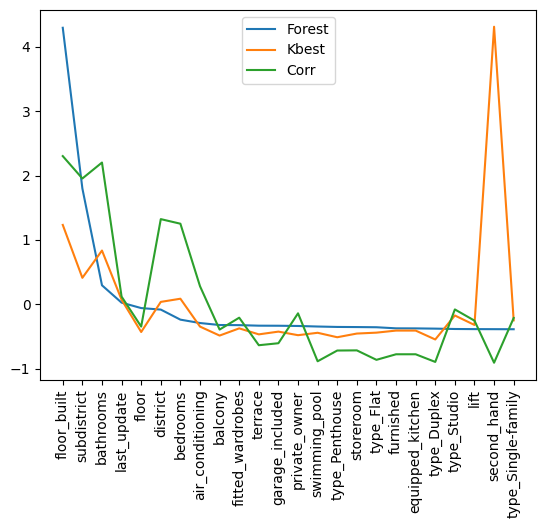

In [27]:
plt.plot(visual_df)
plt.xticks(rotation=90)
plt.legend(visual_df.columns);

Es bastante extraño ese valor tan alto en second_hand. Al hacer un value_counts() vemos que está muy desbalanceado, y también se aprecia que la mediana de ambos grupos no es muy distinta. Vamos a eliminar esta columna de nuestro modelo, pues no tiene la información suficiente para que nos aporte utilidad. 

In [28]:
X_train2['second_hand'].value_counts()

1    5899
0      18
Name: second_hand, dtype: int64

In [29]:
pd.concat([X_train, y_train], axis=1).groupby('second_hand')['price'].median()


second_hand
0    1256.5
1    1400.0
Name: price, dtype: float64

In [30]:
X_train_mod = X_train2.drop('second_hand', axis = 1) #para probar si cambian las mejores columnas al borrar esta

In [31]:
#RandomForest

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train_mod,  y_train)
names = X_train_mod.columns
scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)
df_forest = pd.DataFrame(scores, columns=['Score', 'Feature']).set_index('Feature')


#SelectKBest
sel = SelectKBest(k=5)
X_new = sel.fit_transform(X_train_mod, y_train)
df_kbest = pd.DataFrame({'column': names, 'score': sel.scores_}).sort_values('score', ascending=False).set_index('column')

#Corr
corr= pd.DataFrame(X_train_mod.copy())
corr['target'] = y_train
corr_lin = np.abs(corr.corr()['target']).sort_values(ascending=True)
df_corr = pd.DataFrame(corr_lin).sort_values(by = 'target', ascending= False)
df_corr.rename(columns={'target': 'Score'}, inplace= True)


#merge de los 3
merged_df = pd.merge(df_forest, df_kbest, left_index=True, right_index=True)
final_df = pd.merge(merged_df, df_corr, left_index=True, right_index=True)
final_df.columns= [['Forest', 'Kbest', 'Corr']]
final_df

,Forest,Kbest,Corr
floor_built,0.4994,17.939393,0.693390
subdistrict,0.2331,10.000592,0.620337
bathrooms,0.0749,14.094523,0.672362
last_update,0.0441,6.721511,0.234918
floor,0.0358,1.873392,0.137166
district,0.0336,6.390320,0.487787
bedrooms,0.0158,6.865823,0.472797
air_conditioning,0.0106,2.686170,0.268920
fitted_wardrobes,0.0072,2.419566,0.166187
balcony,0.0072,1.338431,0.127439


c:\Users\jimea\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\jimea\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


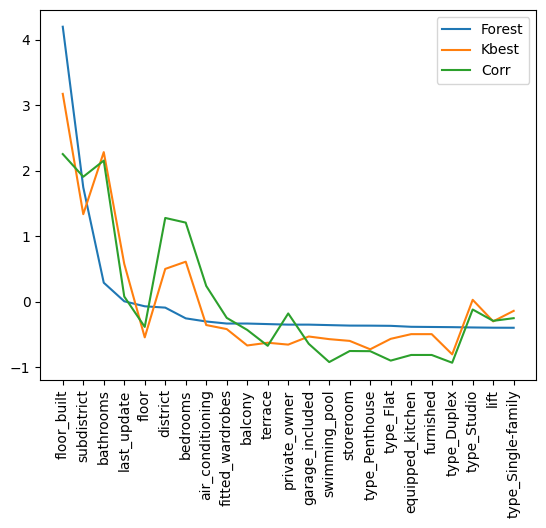

In [32]:
scale = StandardScaler()
visual_df = scale.fit_transform(final_df)
visual_df = pd.DataFrame(data = visual_df, columns = ['Forest', 'Kbest', 'Corr'], index= final_df.index)
visual_df.columns = ['Forest', 'Kbest', 'Corr']

plt.plot(visual_df)
plt.xticks(rotation=90)
plt.legend(visual_df.columns);

Ahora se ve como las feature importances tienen más lógica.

Los peores scores de cada método: 

In [122]:
df_kbest.sort_values(by='score')[:6]

,score
column,
type_Duplex,0.752215
type_Penthouse,1.087180
balcony,1.338431
private_owner,1.394986
terrace,1.518771
storeroom,1.640275


In [121]:
df_corr.sort_values(by='Score')[:6]

,Score
type_Duplex,0.021863
swimming_pool,0.023977
type_Flat,0.028678
furnished,0.046844
equipped_kitchen,0.046844
type_Penthouse,0.059035


In [120]:
df_forest.sort_values(by='Score')[:6]

,Score
Feature,
type_Single-family,0.0002
lift,0.0003
type_Studio,0.0007
type_Duplex,0.0012
furnished,0.0015
equipped_kitchen,0.0018


In [59]:
final_df.index

Index(['floor_built', 'subdistrict', 'bathrooms', 'last_update', 'floor',
       'district', 'bedrooms', 'air_conditioning', 'fitted_wardrobes',
       'balcony', 'terrace', 'private_owner', 'garage_included',
       'swimming_pool', 'storeroom', 'type_Penthouse', 'type_Flat',
       'equipped_kitchen', 'furnished', 'type_Duplex', 'type_Studio', 'lift',
       'type_Single-family'],
      dtype='object')

-------

In [135]:
#para trastea: 
pd.concat([X_train, y_train], axis=1).groupby('type_Single-family')['floor_built'].mean()


type_Single-family
0     93.306919
1    304.959184
Name: floor_built, dtype: float64

In [133]:
#para trastear: 
X_train2['type_Single-family'].value_counts() 

0    5868
1      49
Name: type_Single-family, dtype: int64

-----

*Rule of thumb*: como máximo para elegir son unas 18 columnas

In [106]:
5 * np.log10(5917)

18.860507846385058

Tras echar un vistazo a los resultados de SelectKbest, Feature Importanca de RandomForest y la Correlación lineal, además de mi propio criterio y trastear con value_counts y groupby, me quedo con las columnas que muestro a continuación:

In [104]:
columnas_seleccionadas = ['floor_built', 'subdistrict', 'bathrooms', 'last_update', 'floor',
       'district', 'bedrooms', 'air_conditioning', 'fitted_wardrobes', 'furnished', 'equipped_kitchen',
       'balcony', 'garage_included', 'private_owner', 'type_Single-family', 'type_Studio']

X_train3 = X_train2.loc[:, columnas_seleccionadas]

X_test3 = X_test2.loc[:,columnas_seleccionadas]

------

In [138]:
#probaremos con menos columnas

columnas_seleccionadas2 = ['floor_built', 'subdistrict', 'bathrooms', 'floor',
       'district', 'bedrooms', 'air_conditioning', 'fitted_wardrobes', 
       'garage_included', 'private_owner', 'balcony']
       
X_train2 = X_train2.loc[:, columnas_seleccionadas2]

X_test2 = X_test2.loc[:,columnas_seleccionadas2]

In [16]:
#con menos columnas aún

columnas_seleccionadas3 = ['floor_built', 'subdistrict', 'bathrooms', 'last_update', 'floor',
       'district', 'bedrooms', 'air_conditioning', 'fitted_wardrobes']
       
X_train4 = X_train2.loc[:, columnas_seleccionadas3]

X_test4 = X_test2.loc[:,columnas_seleccionadas3]

In [109]:
X_train3.to_csv('../Data/X_train.csv')
X_test3.to_csv('../Data/X_test.csv')
y_train.to_csv('../Data/y_train.csv')
y_test.to_csv('../Data/y_test.csv')

In [139]:
X_train2.to_csv('../Data/X_train2.csv')
X_test2.to_csv('../Data/X_test2.csv')

In [17]:
X_train4.to_csv('../Data/X_train3.csv')
X_test4.to_csv('../Data/X_test3.csv')

-------